# Exercise 0.10
Over the next couple of exercises we will make use of the Galton dataset, a dataset of heights of fathers
and sons from the 1877 paper that first discussed the “regression to the mean” phenomenon. This dataset has 928 pairs
of numbers.
* Use the ``load()`` function in the ``galton.py`` file to load the dataset. The file is located under the lxmls/readers folder. Type the following in your Python interpreter:

``import galton as galton
galton_data = galton.load()``

* What are the mean height and standard deviation of all the people in the sample? What is the mean height of the
fathers and of the sons?
* Plot a histogram of all the heights (you might want to use the plt.hist function and the ravel method on
arrays).
* Plot the height of the father versus the height of the son.
* You should notice that there are several points that are exactly the same (e.g., there are 21 pairs with the values 68.5
and 70.2). Use the ``?`` command in ipython to read the documentation for the numpy.random.randn function
and add random jitter (i.e., move the point a little bit) to the points before displaying them. Does your impression
of the data change?

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from lxmls.readers import galton

In [4]:
galton_data = galton.load()

In [5]:
print(galton_data.mean(0))
print(galton_data.std(0))

[68.30818966 68.08846983]
[1.78637014 2.51658435]


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  

([array([  0.,  14.,  23.,  66., 289., 219., 183.,  68.,  43.,  23.]),
  array([ 12.,  32., 107., 117., 138., 120., 167., 163.,  41.,  31.])],
 array([61.7, 62.9, 64.1, 65.3, 66.5, 67.7, 68.9, 70.1, 71.3, 72.5, 73.7]),
 <a list of 2 Lists of Patches objects>)

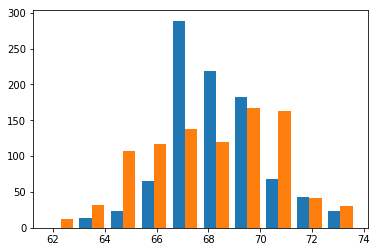

In [7]:
plt.hist(galton_data)

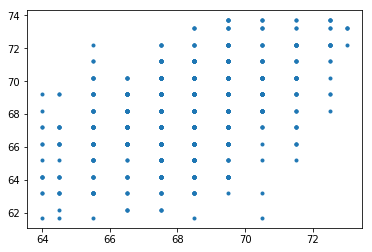

In [8]:
plt.plot(galton_data[:,0], galton_data[:,1], '.')

In [9]:
import numpy as np
np.random.randn?

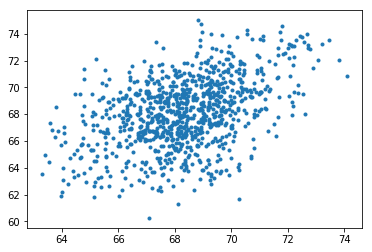

In [10]:
galton_data_randn = galton_data + 0.5*np.random.randn(len(galton_data), 2)
plt.plot(galton_data_randn[:,0], galton_data_randn[:,1], '.')

# Exercise 0.11 
Consider the function $f(x) = x^2$ and its derivative 
$ \frac{\partial f}{\partial x} $.
Look at the derivative of that function at points ``[-2,0,2]``, draw the tangent to the graph in that point 
$ \frac{\partial f}{\partial x}(-2)=-4 $, 
$ \frac{\partial f}{\partial x}(0)=0 $ and 
$ \frac{\partial f}{\partial x}(2)=4 $. 

For example, the tangent
equation for $x = −2$ is $y = −4x − b$, where $b = f(−2)$. The following code plots the function and the derivatives on
those points using matplotlib (See Figure 4).

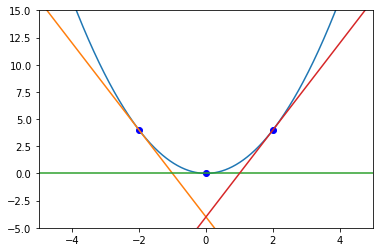

In [11]:
import numpy as np
import matplotlib.pyplot as plt

a = np.arange(-5,5,0.01)
f_x = np.power(a,2)
plt.plot(a,f_x)
plt.xlim(-5,5)
plt.ylim(-5,15)
k = np.array([-2,0,2])
plt.plot(k,k**2,"bo")
for i in k:
    plt.plot(a, (2*i)*a - (i**2))

# Exercise 0.12 
Consider the function $f(x) = (x + 2)^2 − 16 \text{exp}(−(x − 2)^2)$
. Make a function that computes the
function value given x

In [12]:
def get_y(x):
    return (x+2)**2 - 16*np.exp(-((x-2)**2))

Draw a plot around $x \in [−8, 8]$.

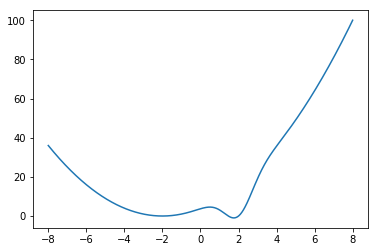

In [13]:
x = np.arange(-8, 8, 0.001)
y = get_y(x)
plt.plot(x, y)

Calculate the derivative of the function $f(x)$, implement the function ``get grad(x)``.

In [14]:
def get_grad(x):
    return (2*x+4)-16*(-2*x + 4)*np.exp(-((x-2)**2))

Use the method gradient descent to find the minimum of this function. Convince yourself that the code is doing the
proper thing. Look at the constants we defined. Note, that we are using a simple approach to pick the step size (always
have the value step size) which is not necessarily correct

In [15]:
def gradient_descent(start_x,func,grad, step_size=0.1):
    # Precision of the solution
    prec = 0.0001
    #Use a fixed small step size
    #step_size = 0.1
    #max iterations
    max_iter = 100
    x_new = start_x
    res = []
    for i in range(max_iter):
        x_old = x_new
        #Use beta egual to -1 for gradient descent
        x_new = x_old - step_size * grad(x_new)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new,f_x_new])
        if(abs(f_x_new - f_x_old) < prec):
            print("change in function values too small, leaving")
            return np.array(res)
    print("exceeded maximum number of iterations, leaving")
    return np.array(res)

Run the gradient descent algorithm starting from $x_0 = −8$ and plot the minimizing sequence.

change in function values too small, leaving


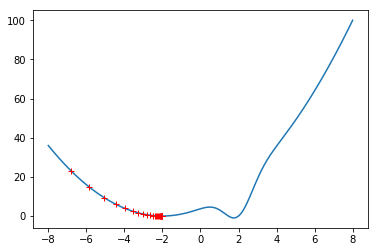

In [16]:
x = np.arange(-8,8,0.001)
y = get_y(x)
plt.plot(x,y)

x_0 = -8
res = gradient_descent(x_0,get_y,get_grad)
plt.plot(res[:,0],res[:,1],'r+')

change in function values too small, leaving


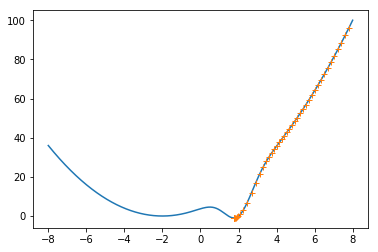

In [17]:
x = np.arange(-8,8,0.001)
y = get_y(x)
plt.plot(x,y)

x_0 = 8
res = gradient_descent(x_0,get_y,get_grad, step_size=0.01)
plt.plot(res[:,0],res[:,1],'+')

# Exercise 0.13 
Consider the linear regression problem (ordinary least squares) on the Galton dataset, with a single response
variable

\begin{equation*}
y = x^Tw + ε
\end{equation*}

The linear regression problem is, given a set $\{y
(i)\}_i$ of samples of $y$ and the corresponding $x^{(i)}$ vectors, estimate w
to minimise the sum of the $\epsilon$ variables. Traditionally this is solved analytically to obtain a closed form solution (although
this is **not the way in which it should be computed** in this exercise, linear algebra packages have an optimised solver,
with numpy, use ``numpy.linalg.lstsq``).
Alternatively, we can define the error function for each possible $w$:

\begin{equation*}
e(w) = \sum_i ( x^{(i)^T} w - y^{(i)} )^2.
\end{equation*}


1) Derive the gradient of the error $\frac{\partial e}{\partial w_j}$.

\begin{equation*}
\frac{\partial e}{\partial w_j} = \sum_i 2 x_j^{(i)} ( x^{(i)^T} w - y^{(i)} ).
\end{equation*}

2) Implement a solver based on this for two dimensional problem (*i.e.*, $w \in R^2$)

3) Use this method on the Galton dataset from the previous exercise to estimate the relationship between father and son’s height. Try two formulas

$s = f w_1 + \epsilon$, 

where s is the son’s height, and f is the father heights; and

$s = f w_1 + 1w_0 + \epsilon$,

where the input variable is now two dimensional: $(f , 1)$. This allows the intercept to be non-zero.

In [36]:
# Get data.
use_bias = True #True
y = galton_data[:,0] 
if use_bias:
    x = np.vstack( [galton_data[:,1], np.ones(galton_data.shape[0])] )  
else:
    x = np.vstack( [galton_data[:,1], np.zeros(galton_data.shape[0])] )
    
# derivative of the error function e
def get_e_dev(w, x, y): # y, x, 
    error_i = np.matmul(w, x) - y
    derro_dw = np.matmul(2*x, error_i) / len(y)
    # print(derro_dw, np.multiply(error_i,error_i).sum())
    return derro_dw

# Initialize w.
w = np.array([1,0])

get_e_dev(w, x, y)

array([-21.37915948,  -0.43943966])

In [39]:
# Initialize w.
#w = np.array([0.5,50.0])
w = np.array([.5, 50.0])

def grad_desc(start_w, eps, prec, x,y): #gradient=get_e_dev
    '''
    runs the gradient descent algorithm and returns the list of estimates
    example of use grad_desc(start_x=3.9, eps=0.01, prec=0.00001)
    '''
    w_new = start_w
    w_old = start_w + prec * 2
    res = [w_new]
    mses = []
    while abs(w_old-w_new).sum() > prec:
        w_old = w_new
        w_new = w_old - eps * get_e_dev(w_new, x, y)
        res.append(w_new)
        
        error_i = np.matmul(w_new, x) - y
        mse = np.multiply(error_i, error_i).mean()
        mses.append(mse)
        print(w_new, mse)
    return np.array(res), np.array(mses)

res, mses = grad_desc(w, 0.0002, 0.00001, x, y)
w_sgd = res[-1]
w_sgd
#res

[ 0.07098102 49.99370558] 184.68095528527564
[ 0.43879991 49.99909818] 136.4220600489782
[ 0.12345095 49.99447093] 100.9495202572448
[ 0.393815   49.99843418] 74.87554833579645
[ 0.16201881 49.99503238] 55.70996234146782
[ 0.36074901 49.997945  ] 41.622362352741895
[ 0.190368   49.99544396] 31.267319019815016
[ 0.33644399 49.99758431] 23.655878992091928
[ 0.211206   49.99574537] 18.061115411765847
[ 0.31857867 49.99731807] 13.948703119532933
[ 0.22652292 49.9959658 ] 10.925888191392636
[ 0.30544685 49.99712125] 8.703978167086031
[ 0.23778158 49.99612672] 7.0707706177701
[ 0.29579436 49.99697547] 5.870286856760637
[ 0.24605724 49.99624388] 4.987875271291632
[ 0.28869935 49.9968672 ] 4.339261576271314
[ 0.25214026 49.99632889] 3.862500239871777
[ 0.2834842  49.99678649] 3.51205840578615
[ 0.25661157 49.99639025] 3.2544673000402407
[ 0.27965084 49.99672606] 3.0651258120911775
[ 0.25989821 49.99643424] 2.9259509777883514
[ 0.27683316 49.99668051] 2.8236509747197633
[ 0.26231406 49.99646546

array([ 0.26902114, 49.99646059])

4) Plot the regression line you obtain with the points from the previous exercise.

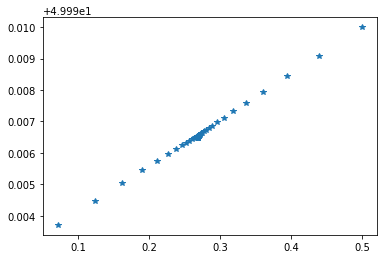

In [20]:
plt.plot(res[:, 0], res[:, 1], '*')
plt.show()

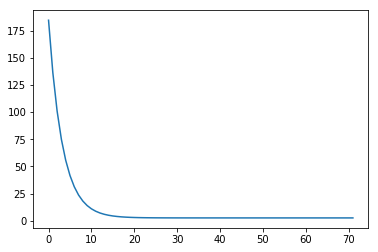

In [21]:
plt.plot(mses)

In [22]:
np.multiply(y - np.matmul(w_sgd,x), y - np.matmul(w_sgd,x)).sum()

2356.9754700051644

5) Use the ``np.linalg.lstsq`` function and compare to your solution.

In [23]:
from numpy.linalg import lstsq
m, c = np.linalg.lstsq(x.T, y)[0]
print(m,c)
w_lstsq = np.array([m, c])
error2  = np.multiply(y - np.matmul(w_lstsq,x), y - np.matmul(w_lstsq,x)).sum()
print(error2)
#lstsq(a=, b=)

0.3256474973105947 46.135349860111255
2338.1017855270875


/Users/marc/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Plotting regressions:

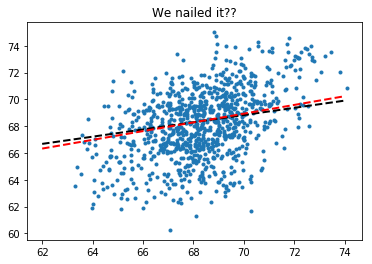

In [24]:
plt.plot(galton_data_randn[:,0], galton_data_randn[:,1], ".")
plt.title("We nailed it??")
maxim, minim = int(np.max(galton_data_randn[:,0])), int(np.min(galton_data_randn[:,0]))
xvals = np.array(range(minim-1, maxim+1))

# Gradient descent solution
yvals = w_sgd[0] * xvals + w_sgd[1]
plt.plot(xvals, yvals, '--', c='k',linewidth=2)

# solution from closed form
yvals2 = w_lstsq[0]  * xvals + w_lstsq[1]
plt.plot(xvals, yvals2, '--', c='r',linewidth=2)

# Exercise 0.14 
Use the debugger to debug the ``buggy.py`` script which attempts to repeatedly perform the following
computation:....

1. Start $x_0 = 0$
2. Iterate

    (a) $x'_{t+1} = x_t + r$, where $r$ is a random variable.

    (b) if $x'_{t+1} >= 1$, then stop.
    
    (c) if $x'_{t+1} <= 0$, then $x_{t+1} = 0$

    (d) else $x_{t+1} = x'_{t+1}$

3. Return the number of iterations

Having repeated this computation a number of times, the programme prints the average. Unfortunately, the program
has a few bugs, which you need to fix.

In [57]:
def next_x(x):
    x += np.random.normal(scale=.0625)
    if x < 0:
        return 0.
    return x


def walk(x):
    iters = 0
    while x <= 1.:
        x = next_x(x)
        iters += 1
    return iters


walks = np.array([walk(0) for i in range(1000)])

print(np.mean(walks))

294.177
